In [ ]:
from google.colab import drive, files
from google.colab.patches import cv2_imshow
drive.mount('/content/drive/')
dataset_folder = '/content/drive/MyDrive/dataset'

Mounted at /content/drive/


In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
train.head()

,filename,label
0,/kaggle/input/agricultural-pests-image-dataset...,snail
1,/kaggle/input/agricultural-pests-image-dataset...,wasp
2,/kaggle/input/agricultural-pests-image-dataset...,bees
3,/kaggle/input/agricultural-pests-image-dataset...,grasshopper
4,/kaggle/input/agricultural-pests-image-dataset...,weevil


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test.head()

,filename,label
0,/kaggle/input/agricultural-pests-image-dataset...,wasp
1,/kaggle/input/agricultural-pests-image-dataset...,snail
2,/kaggle/input/agricultural-pests-image-dataset...,catterpillar
3,/kaggle/input/agricultural-pests-image-dataset...,weevil
4,/kaggle/input/agricultural-pests-image-dataset...,beetle


In [ ]:
train['filename']=train['filename'].str.replace('/content/drive/MyDrive/dataset/','/content/drive/MyDrive/dataset/train/')
train.head()

,filename,label
0,/kaggle/input/agricultural-pests-image-dataset...,snail
1,/kaggle/input/agricultural-pests-image-dataset...,wasp
2,/kaggle/input/agricultural-pests-image-dataset...,bees
3,/kaggle/input/agricultural-pests-image-dataset...,grasshopper
4,/kaggle/input/agricultural-pests-image-dataset...,weevil


In [ ]:
test['filename']=test['filename'].str.replace('/content/drive/MyDrive/dataset/','/content/drive/MyDrive/dataset/test/')
test.head()

,filename,label
0,/kaggle/input/agricultural-pests-image-dataset...,wasp
1,/kaggle/input/agricultural-pests-image-dataset...,snail
2,/kaggle/input/agricultural-pests-image-dataset...,catterpillar
3,/kaggle/input/agricultural-pests-image-dataset...,weevil
4,/kaggle/input/agricultural-pests-image-dataset...,beetle


In [ ]:
!pip install lobe[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-es

In [ ]:
from lobe import ImageModel

model = ImageModel.load('/content/drive/MyDrive/dataset_res/train TensorFlow')
model

In [ ]:
import os

# Specify the base paths for train and test datasets
base_train_path = '/content/drive/MyDrive/dataset/train'
base_test_path = '/content/drive/MyDrive/dataset/test'

result = []  # Initialize an empty list to store predictions

# Iterate through filenames in the 'test' dataset
for filename in test.filename:
    # Replace the Kaggle input path with the local test dataset path
    # Assuming test.filename contains the full path
    file_path = filename.replace('/kaggle/input/agricultural-pests-image-dataset', base_test_path)

    # Predict the class using the trained model for the current file
    result_i = model.predict_from_file(file_path)

    # Append the predicted class to the 'result' list
    result.append(result_i.prediction)

# Display the first five predictions
result[:5]


KeyboardInterrupt: ignored

In [ ]:
test=test.assign(prediction=result)
test.head()

,filename,label,prediction
0,/kaggle/input/agricultural-pests-image-dataset...,wasp,wasp
1,/kaggle/input/agricultural-pests-image-dataset...,snail,snail
2,/kaggle/input/agricultural-pests-image-dataset...,catterpillar,catterpillar
3,/kaggle/input/agricultural-pests-image-dataset...,weevil,weevil
4,/kaggle/input/agricultural-pests-image-dataset...,beetle,beetle


In [ ]:
import os

# Specify the base paths for train and test datasets
base_train_path = '/content/drive/MyDrive/dataset/train'
base_test_path = '/content/drive/MyDrive/dataset/test'

result = []  # Initialize an empty list to store predictions

# Iterate through filenames in the 'train' dataset
for filename in train.filename:
    # Replace the Kaggle input path with the local train dataset path
    # Assuming train.filename contains the full path
    file_path = filename.replace('/kaggle/input/agricultural-pests-image-dataset', base_train_path)

    # Predict the class using the trained model for the current file
    result_i = model.predict_from_file(file_path)

    # Append the predicted class to the 'result' list
    result.append(result_i.prediction)

# Display the first five predictions
result[:5]


['snail', 'wasp', 'bees', 'grasshopper', 'weevil']

In [ ]:
train=train.assign(prediction=result)
train.head()

,filename,label,prediction
0,/kaggle/input/agricultural-pests-image-dataset...,snail,snail
1,/kaggle/input/agricultural-pests-image-dataset...,wasp,wasp
2,/kaggle/input/agricultural-pests-image-dataset...,bees,bees
3,/kaggle/input/agricultural-pests-image-dataset...,grasshopper,grasshopper
4,/kaggle/input/agricultural-pests-image-dataset...,weevil,weevil


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['label'],train['prediction']))

              precision    recall  f1-score   support

        ants       0.98      0.97      0.97       400
        bees       0.97      0.99      0.98       405
      beetle       0.87      0.94      0.90       331
catterpillar       0.97      0.93      0.95       329
  earthworms       0.96      0.98      0.97       246
      earwig       0.97      0.94      0.95       390
 grasshopper       0.98      0.97      0.97       390
        moth       1.00      0.99      0.99       397
        slug       0.98      0.96      0.97       316
       snail       1.00      1.00      1.00       405
        wasp       0.99      0.98      0.99       392
      weevil       0.98      0.99      0.99       394

    accuracy                           0.97      4395
   macro avg       0.97      0.97      0.97      4395
weighted avg       0.97      0.97      0.97      4395



In [ ]:
print(classification_report(test['label'],test['prediction']))

              precision    recall  f1-score   support

        ants       0.91      0.98      0.94        99
        bees       0.90      0.97      0.93        95
      beetle       0.57      0.67      0.62        85
catterpillar       0.80      0.72      0.76       105
  earthworms       0.82      0.83      0.83        77
      earwig       0.85      0.74      0.79        76
 grasshopper       0.89      0.79      0.84        95
        moth       0.96      0.91      0.93       100
        slug       0.81      0.81      0.81        75
       snail       0.96      0.98      0.97        95
        wasp       0.97      0.96      0.97       106
      weevil       0.93      0.97      0.95        91

    accuracy                           0.87      1099
   macro avg       0.86      0.86      0.86      1099
weighted avg       0.87      0.87      0.87      1099



Code to download image from server to local drive

In [ ]:
import os

local_directory = "/content/drive/MyDrive/img"

def download_specific_image(filename):
    try:
        # URL for the specific image
        url = f"http://ec2-18-156-2-39.eu-central-1.compute.amazonaws.com/uploads/{filename}"

        # Full local path to save the image
        local_filepath = os.path.join(local_directory, filename)

        # Send GET request to download the specific image
        response = requests.get(url)

        if response.status_code == 200:
            image_data = response.content

            # Save the image to the specified local path
            with open(local_filepath, 'wb') as file:
                file.write(image_data)

            print(f"Image downloaded successfully: {local_filepath}")
        else:
            print(f"Failed to download image. Status code: {response.status_code}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    # Specify the filename of the image you want to download
    specific_filename = "ants (5).jpg"

    # Download the specific image
    download_specific_image(specific_filename)


Image downloaded successfully: /content/drive/MyDrive/img/ants (5).jpg


Label the files  downloaded from server to local Drive

In [ ]:
import os

# Specify the base path for train dataset
base_path = '/content/drive/MyDrive/img/'

result = []  # Initialize an empty list to store predictions

# Get a list of all files in the 'train' dataset directory
file_list = os.listdir(base_path)

# Iterate through filenames in the 'train' dataset
for filename in file_list:
    # Construct the full path to the current file
    file_path = os.path.join(base_path, filename)

    # Check if the current item is a file (not a directory)
    if os.path.isfile(file_path):
        # Predict the class using the trained model for the current file
        result_i = model.predict_from_file(file_path)

        # Append the predicted class to the 'result' list
        result.append(result_i.prediction)

# Display the first five predictions
result[:10]


['bees',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'ants',
 'earthworms',
 'ants',
 'weevil',
 'catterpillar']

In [ ]:
!pip install opencv-python

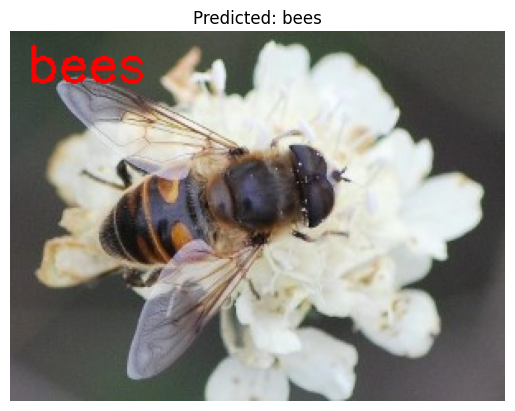

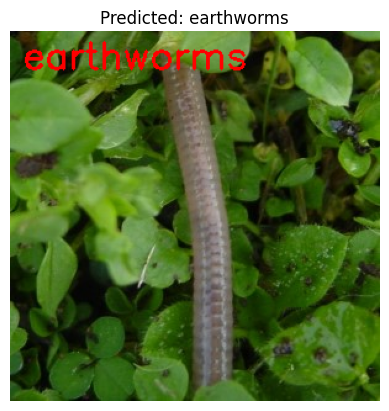

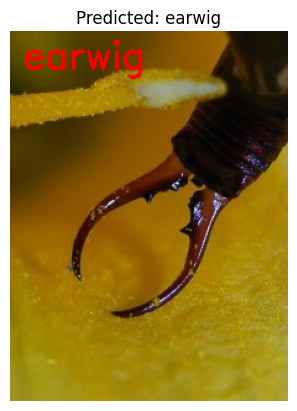

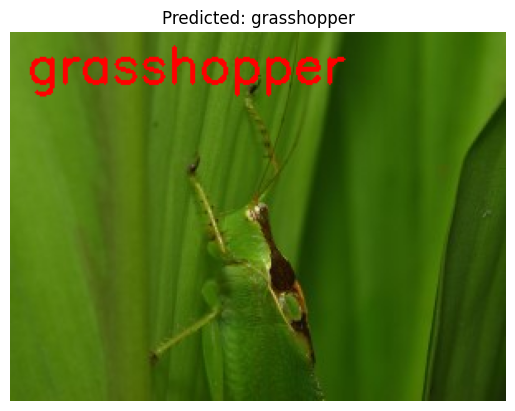

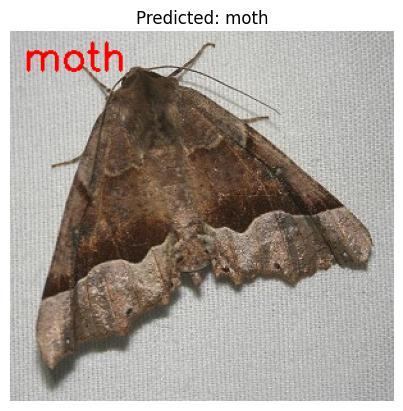

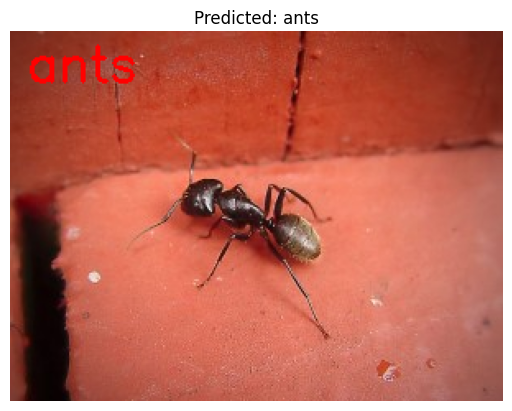

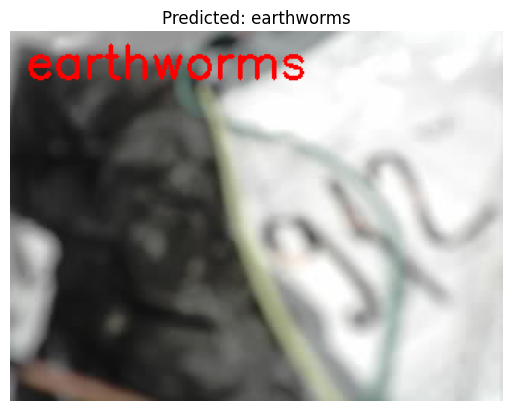

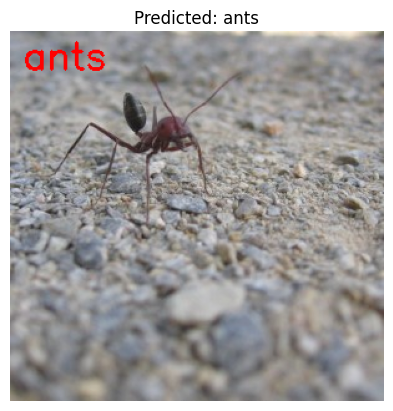

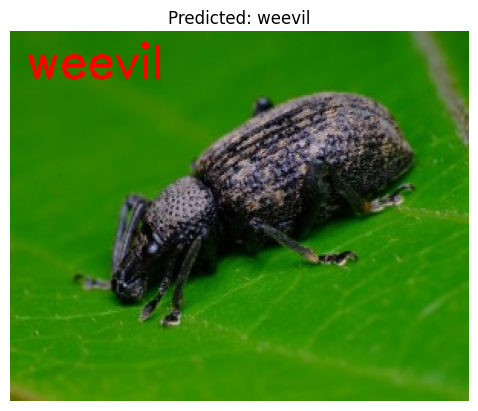

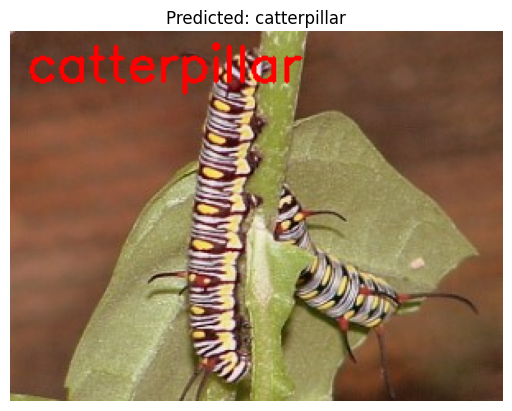

['bees', 'earthworms', 'earwig', 'grasshopper', 'moth', 'ants', 'earthworms', 'ants', 'weevil', 'catterpillar']


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the base path for the train dataset
base_path = '/content/drive/MyDrive/img/'

result = []  # Initialize an empty list to store predictions

# Get a list of all files in the 'train' dataset directory
file_list = os.listdir(base_path)

# Iterate through the first five filenames in the 'train' dataset
for filename in file_list[:10]:
    # Construct the full path to the current file
    file_path = os.path.join(base_path, filename)

    # Check if the current item is a file (not a directory)
    if os.path.isfile(file_path):
        # Load the image
        img = cv2.imread(file_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Predict the class using the trained model for the current file
        result_i = model.predict_from_file(file_path)

        # Append the predicted class to the 'result' list
        result.append(result_i.prediction)

        # Draw the predicted label on the image
        label = result_i.prediction
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_thickness = 2
        color = (255, 0, 0)  # Blue color in BGR

        # Specify the position where you want to write the label
        text_position = (10, 30)

        # Put the label on the image
        cv2.putText(img_rgb, label, text_position, font, font_scale, color, font_thickness)

        # Display the image
        plt.imshow(img_rgb)
        plt.title(f'Predicted: {result_i.prediction}')
        plt.axis('off')
        plt.show()

# Display all predictions
print(result)

